In [1]:
## important ideas in 'practical' machine learning
## how to assess the performance of our model
## how to fine tune the parameters of a model to 
## achieve optimal performance 
## what metrics our useful for our predictive 
## models to be considered good

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header = None)

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
from sklearn.preprocessing import LabelEncoder

X = data.loc[:, 2:].values
y = data.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
le.transform(['M', 'B'])

array([1, 0])

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 42)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(), 
                       PCA(n_components = 2),
                       LogisticRegression(random_state = 42, solver = 'lbfgs'))

In [9]:
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test accuracy: 0.947


In [10]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits = 10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist : %s, Acc: %.3f' % (k + 1, np.bincount(y_train[train]),score))

Fold:  1, Class dist : [256 153], Acc: 0.957
Fold:  2, Class dist : [256 153], Acc: 0.913
Fold:  3, Class dist : [256 153], Acc: 0.978
Fold:  4, Class dist : [256 153], Acc: 1.000
Fold:  5, Class dist : [256 153], Acc: 0.935
Fold:  6, Class dist : [257 153], Acc: 0.911
Fold:  7, Class dist : [257 153], Acc: 0.911
Fold:  8, Class dist : [257 153], Acc: 0.978
Fold:  9, Class dist : [257 153], Acc: 0.911
Fold: 10, Class dist : [257 153], Acc: 0.956


In [11]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.945 +/- 0.032


In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = pipe_lr, X = X_train, y = y_train, cv = 10, n_jobs = -1, verbose = 3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished


In [13]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.945 +/- 0.032


In [14]:
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(), 
                       LogisticRegression(penalty = 'l2',
                                         random_state = 42,
                                         solver = 'lbfgs',
                                         max_iter = 1000))
train_sizes, train_scores, test_scores = learning_curve(estimator = pipe_lr, X = X_train, y = y_train, train_sizes = np.linspace(0.1, 1.0, 10),cv = 10, n_jobs = -1, verbose = 3)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.mean(test_scores, axis = 1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 40  81 122 163 204 245 286 327 368 409]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


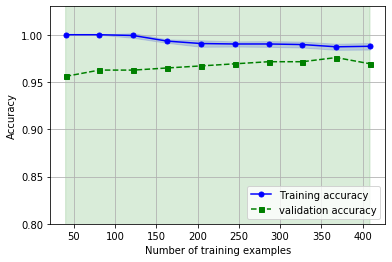

In [15]:
plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.8, 1.03])
plt.show()

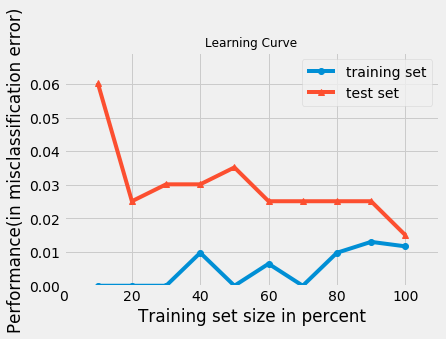

In [16]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(X_train[:256], y_train[:256],X_train[256:], y_train[256:], clf = pipe_lr)
plt.ylabel('Performance(in misclassification error)')
plt.title('Learning Curve')
plt.show()

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [18]:
print('Accuracy score:', accuracy_score(y_train, pipe_lr.predict(X_train)))
print('Recall score:', recall_score(y_train, pipe_lr.predict(X_train)))
print('Precision score:', precision_score(y_train, pipe_lr.predict(X_train)))
print('F1 score:', f1_score(y_train, pipe_lr.predict(X_train)))

Accuracy score: 0.9868131868131869
Recall score: 0.9764705882352941
Precision score: 0.9880952380952381
F1 score: 0.9822485207100591


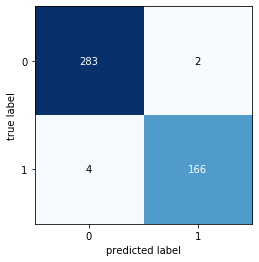

In [19]:
conf_mat = confusion_matrix(y_train, pipe_lr.predict(X_train))
plot_confusion_matrix(conf_mat)
plt.show()

In [20]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
estimator = pipe_lr, 
X = X_train, y = y_train, param_name = 'logisticregression__C',
param_range = param_range, cv = 10, verbose = 3, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  60 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  40 out of  60 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished


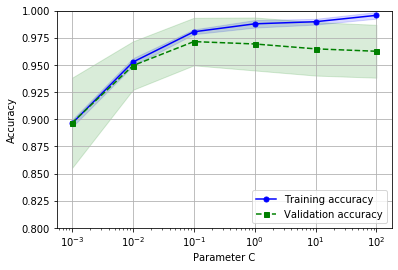

In [21]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)
plt.plot(param_range, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(param_range, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'Validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')
plt.grid()
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                        SVC(random_state = 42))
param_range = [0.0001, 0.001, 0.01, 0.1, 10, 10.0, 100, 1000]
param_grid = [{'svc__C' : param_range, 
              'svc__kernel' : ['Linear']},
             {'svc__C' : param_range, 
             'svc__gamma' : param_range,
             'svc__kernel' : ['rbf']}]
gs = GridSearchCV(estimator = pipe_svc, 
                 param_grid = param_grid, 
                 scoring = 'accuracy',
                 cv = 10,
                 refit = True,
                 n_jobs = -1,
                 verbose = 3)
gs = gs.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    3.9s finished


In [26]:
print(gs.best_score_)

0.9757004830917875


In [29]:
print(gs.best_params_)

{'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [31]:
best_svm = gs.best_estimator_
print('Accuracy Score:', accuracy_score(y_train, best_svm.predict(X_train)))
print('Precision Score:', precision_score(y_train, best_svm.predict(X_train)))
print('Recall Score:', recall_score(y_train, best_svm.predict(X_train)))
print('F1 score', f1_score(y_train, best_svm.predict(X_train)))

Accuracy Score: 0.9934065934065934
Precision Score: 1.0
Recall Score: 0.9823529411764705
F1 score 0.9910979228486646


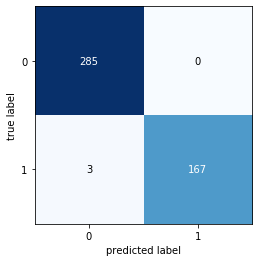

In [32]:
conf_mat = confusion_matrix(y_train, best_svm.predict(X_train))
plot_confusion_matrix(conf_mat)
plt.show()

In [35]:
y_predictions = best_svm.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, y_predictions))
print('Precision Score:', precision_score(y_test, y_predictions))
print('Recall Score:', recall_score(y_test, y_predictions))
print('F1 Score:', f1_score(y_test, y_predictions))

Accuracy Score: 0.956140350877193
Precision Score: 0.9512195121951219
Recall Score: 0.9285714285714286
F1 Score: 0.9397590361445782


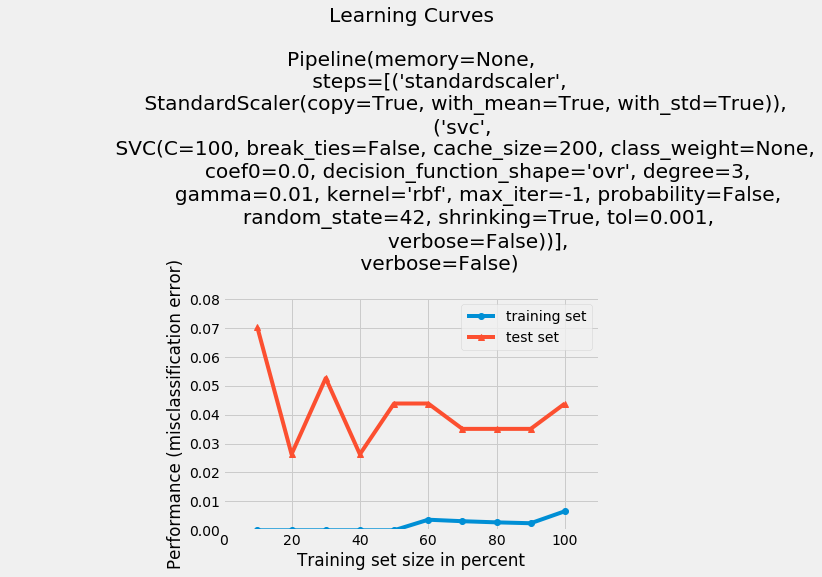

In [38]:
plot_learning_curves(X_train, y_train, X_test, y_test, best_svm)
plt.show()

In [41]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 42),
                 param_grid = [{'max_depth' : [1, 2, 3, 4, 5, 6, 7, None]}], 
                 scoring = 'accuracy',
                 cv = 2)

In [42]:
scores = cross_val_score(gs, X_train, y_train, scoring= 'accuracy', cv = 5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.927 +/- 0.035


In [43]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_test, y_pred)
print(confmat)

[[72  0]
 [ 3 39]]


In [49]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.9642857142857143